# Syed Noor Razi Ali - 2070326

# Part 1


In [1]:
import pandas as pd
import numpy as np
from numpy import *
from numpy import linalg as la
import pdb
import pylab as pl
from matplotlib import cm
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition


A.

[5 pts] Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range

In [2]:
segment_data = pd.read_table("segmentation_data.txt", delimiter =",", header = None)
segment_class= pd.read_table("segmentation_classes.txt", header = None)
segment_names = pd.read_table("segmentation_names.txt", header = None)

In [3]:
segment_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
segment_class.head()

,0,1
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [5]:
segment_names.head()

,0
0,REGION-CENTROID-COL
1,REGION-CENTROID-ROW
2,REGION-PIXEL-COUNT
3,SHORT-LINE-DENSITY-5
4,SHORT-LINE-DENSITY-2


In [6]:
segment_names.describe()

,0
count,19
unique,19
top,HUE-MEAN
freq,1


In [7]:
segment_class.describe()

,1
count,2100.000000
mean,3.000000
std,2.000476
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,6.000000


In [8]:
segment_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,2100.000000,2100.000000,2100.0,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,124.940476,123.483333,9.0,0.014921,0.004550,1.890820,5.708299,2.406772,7.904224e+00,37.047654,32.806667,44.205556,34.130741,-12.722963,21.473704,-8.750741,45.162381,0.427259,-1.365147
std,72.858637,57.431428,0.0,0.041024,0.023573,2.649453,44.989359,3.469954,5.347107e+01,38.135291,34.994538,43.510119,36.303768,11.588214,19.654107,11.606996,42.900582,0.228458,1.544278
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.349603,0.833332,4.216377e-01,7.472222,7.000000,9.666667,6.222222,-18.583333,4.305556,-17.000000,11.777778,0.284934,-2.188539
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.277776,0.833333,1.444444,9.897442e-01,21.666666,19.666668,27.777779,20.444445,-10.888889,19.666666,-11.000000,28.666666,0.375064,-2.052625
75%,188.250000,171.250000,9.0,0.000000,0.000000,2.222221,1.807406,2.555556,2.251852e+00,53.277778,47.333332,65.000000,46.388888,-4.222222,36.111110,-3.222222,65.000000,0.540228,-1.565745
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


In [9]:
segment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 19 columns):
0     2100 non-null float64
1     2100 non-null float64
2     2100 non-null int64
3     2100 non-null float64
4     2100 non-null float64
5     2100 non-null float64
6     2100 non-null float64
7     2100 non-null float64
8     2100 non-null float64
9     2100 non-null float64
10    2100 non-null float64
11    2100 non-null float64
12    2100 non-null float64
13    2100 non-null float64
14    2100 non-null float64
15    2100 non-null float64
16    2100 non-null float64
17    2100 non-null float64
18    2100 non-null float64
dtypes: float64(18), int64(1)
memory usage: 311.8 KB


In [10]:
segment_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 2 columns):
0    2100 non-null object
1    2100 non-null int64
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [11]:
segment_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
0    19 non-null object
dtypes: object(1)
memory usage: 280.0+ bytes


In [12]:
segment_names.isnull().sum()

0    0
dtype: int64

In [13]:
segment_class.isnull().sum()

0    0
1    0
dtype: int64

In [14]:
segment_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

Min-Max Normalization

In [15]:
min_max_scaler = MinMaxScaler()

In [16]:
#Image data Normalized
norm_seg_data = min_max_scaler.fit_transform(segment_data)

In [17]:
norm_seg_data

array([[0.43083004, 0.74166667, 0.        , ..., 0.12371135, 0.50813884,
        0.83184923],
       [0.33596838, 0.73333333, 0.        , ..., 0.12739322, 0.46332908,
        0.83698646],
       [0.88537549, 0.97083333, 0.        , ..., 0.11340205, 0.48014903,
        0.84478233],
       ...,
       [0.50197628, 0.625     , 0.        , ..., 0.07216495, 0.5409177 ,
        0.17591546],
       [0.58893281, 0.6125    , 0.        , ..., 0.08100147, 0.50308645,
        0.18478933],
       [0.48616601, 0.62916667, 0.        , ..., 0.09646539, 0.4799313 ,
        0.17037463]])

B.

Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). 

In [18]:
# initialization
k_means = KMeans(n_clusters=7, max_iter=500, verbose=1) 

In [19]:
k_means.fit(norm_seg_data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 388.31187686519746
start iteration
done sorting
end inner loop
Iteration 1, inertia 371.02126244282647
start iteration
done sorting
end inner loop
Iteration 2, inertia 364.3267340569213
start iteration
done sorting
end inner loop
Iteration 3, inertia 358.7723111677743
start iteration
done sorting
end inner loop
Iteration 4, inertia 354.7753813751451
start iteration
done sorting
end inner loop
Iteration 5, inertia 352.56823683130887
start iteration
done sorting
end inner loop
Iteration 6, inertia 351.72999455515287
start iteration
done sorting
end inner loop
Iteration 7, inertia 351.2034048072719
start iteration
done sorting
end inner loop
Iteration 8, inertia 350.793239497196
start iteration
done sorting
end inner loop
Iteration 9, inertia 350.29429771961316
start iteration
done sorting
end inner loop
Iteration 10, inertia 350.0535651113511
start iteration
done sorting
end inner loop
Iteration 11, 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [20]:
clusters = k_means.predict(norm_seg_data)

In [21]:
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
2095,5
2096,6
2097,4
2098,4


Print the cluster centroids (use some formatting so that they are visually understandable).

In [22]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(k_means.cluster_centers_, columns=segment_names)
centroids.T

,0,1,2,3,4,5,6
"(REGION-CENTROID-COL,)",0.30,0.54,0.51,0.75,0.77,0.25,0.26
"(REGION-CENTROID-ROW,)",0.53,0.15,0.81,0.53,0.43,0.46,0.39
"(REGION-PIXEL-COUNT,)",0.00,0.00,0.00,0.00,0.00,0.00,0.00
"(SHORT-LINE-DENSITY-5,)",0.05,0.03,0.08,0.04,0.01,0.03,0.07
"(SHORT-LINE-DENSITY-2,)",0.05,0.00,0.01,0.04,0.02,0.01,0.02
"(VEDGE-MEAN,)",0.10,0.03,0.05,0.11,0.04,0.04,0.08
"(VEDGE-SD,)",0.01,0.00,0.00,0.02,0.00,0.00,0.00
"(HEDGE-MEAN,)",0.08,0.03,0.05,0.11,0.02,0.03,0.06
"(HEDGE-SD,)",0.01,0.00,0.00,0.02,0.00,0.00,0.00
"(INTENSITY-MEAN,)",0.40,0.82,0.11,0.30,0.04,0.03,0.15


In [23]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(norm_seg_data[clusters == c])
    return size

In [24]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  236
Size of Cluster 1 =  300
Size of Cluster 2 =  297
Size of Cluster 3 =  325
Size of Cluster 4 =  311
Size of Cluster 5 =  291
Size of Cluster 6 =  340


Next, To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visualization of the Silhouettes).

In [25]:
silhouettes = metrics.silhouette_samples(norm_seg_data, clusters)
print(silhouettes[:20])

[0.57236961 0.5609926  0.46573747 0.49551578 0.57187855 0.56013527
 0.54247867 0.41254281 0.51997981 0.46760414 0.48688779 0.49140278
 0.58437635 0.56254708 0.3794524  0.5311416  0.54891047 0.4226305
 0.4161636  0.40382238]


In [26]:
print(silhouettes.mean())

0.3320776409159453


In [27]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def plot_silhouettes(data, clusters, metric='euclidean'):
    

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

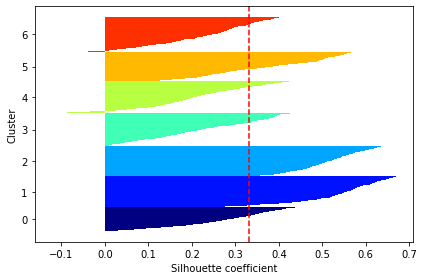

In [28]:
plot_silhouettes(norm_seg_data, clusters)

Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.

In [29]:
complete_score = completeness_score(segment_class[1],clusters)
complete_score

0.6132074717141491

In [30]:
homo_score = homogeneity_score(segment_class[1], clusters)
homo_score

0.6115130439578844

C.

[10 pts] Do your own experiments with the number of clusters to see if a different value of K results in more cohesive clustering based on Silhouette analysis. Please do not provide all your clustering results, but you should include the best result according to your analysis and provide a brief discussion of why this particular clustering was selected


In [31]:
#findding optimal value of K 
range_n_clusters = range(2,10)
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, max_iter=500, verbose=1)
 kmeans.fit(norm_seg_data)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_samples = metrics.silhouette_samples(norm_seg_data, cluster_labels)
 silhouette_avg.append(silhouette_samples.mean())

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 939.7223301677863
start iteration
done sorting
end inner loop
Iteration 1, inertia 930.843937142896
start iteration
done sorting
end inner loop
Iteration 2, inertia 929.5687576507501
start iteration
done sorting
end inner loop
Iteration 3, inertia 929.2529300776673
start iteration
done sorting
end inner loop
Iteration 4, inertia 929.01909709921
start iteration
done sorting
end inner loop
Iteration 5, inertia 928.8372684078408
start iteration
done sorting
end inner loop
Iteration 6, inertia 928.7421655602059
start iteration
done sorting
end inner loop
Iteration 7, inertia 928.7297915545491
start iteration
done sorting
end inner loop
Iteration 8, inertia 928.7247000844436
start iteration
done sorting
end inner loop
Iteration 9, inertia 928.7201323314194
start iteration
done sorting
end inner loop
Iteration 10, inertia 928.7201323314194
center shift 0.000000e+00 within tolerance 4.150157e-06
Initializ

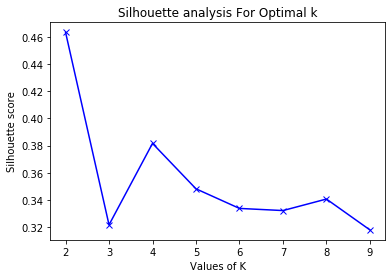

In [32]:
plt.plot(range_n_clusters,silhouette_avg, 'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

By looking at the plot we can say that K=2 has the highest silhouette score. It has a score of about 0.46.

D.

Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient).

In [33]:
pca = decomposition.PCA()
seg_data_trans = pca.fit(norm_seg_data).transform(norm_seg_data)

In [34]:
np.set_printoptions(precision=2,suppress=True, edgeitems=5, linewidth=120)

In [35]:
print(seg_data_trans)

[[-0.69  0.53  0.25 -0.2  -0.08 ...  0.    0.   -0.    0.    0.  ]
 [-0.67  0.51  0.34 -0.17 -0.04 ... -0.   -0.    0.   -0.    0.  ]
 [-0.71  0.77 -0.16 -0.01 -0.17 ... -0.   -0.    0.    0.    0.  ]
 [-0.73  0.51  0.5  -0.06 -0.14 ... -0.   -0.   -0.    0.    0.  ]
 [-0.64  0.53  0.3  -0.18 -0.02 ... -0.   -0.    0.    0.    0.  ]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 ...  0.   -0.    0.   -0.    0.  ]
 [-0.5  -0.26  0.38  0.15  0.03 ...  0.    0.    0.   -0.    0.  ]
 [-0.51 -0.13 -0.08  0.1  -0.03 ... -0.   -0.   -0.    0.    0.  ]
 [-0.48 -0.09 -0.16  0.11  0.   ...  0.   -0.   -0.    0.    0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 ...  0.   -0.   -0.    0.    0.  ]]


In [36]:
print(pca.explained_variance_ratio_)

[0.61 0.13 0.1  0.05 0.04 0.02 0.02 0.02 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a Scree plot of PC variances

In [37]:
variance_Percentage = pca.explained_variance_ratio_*100

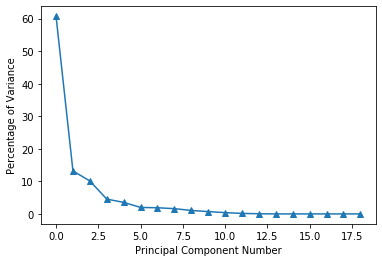

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(19), variance_Percentage[:], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

95% of the variance in the data captured by 6 PC's 

Then use these r components as features to transform the data into a reduced dimension space.

In [39]:
DTtrans_reduced = seg_data_trans[:,:6]

In [40]:
print(DTtrans_reduced)

[[-0.69  0.53  0.25 -0.2  -0.08  0.05]
 [-0.67  0.51  0.34 -0.17 -0.04  0.06]
 [-0.71  0.77 -0.16 -0.01 -0.17  0.04]
 [-0.73  0.51  0.5  -0.06 -0.14  0.03]
 [-0.64  0.53  0.3  -0.18 -0.02  0.05]
 ...
 [-0.5  -0.26  0.27  0.11 -0.01 -0.01]
 [-0.5  -0.26  0.38  0.15  0.03 -0.2 ]
 [-0.51 -0.13 -0.08  0.1  -0.03 -0.03]
 [-0.48 -0.09 -0.16  0.11  0.   -0.  ]
 [-0.44 -0.11 -0.05  0.15  0.02 -0.21]]


E.

[5 pts] Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.

In [41]:
kmeans = KMeans(n_clusters =7,max_iter=500, verbose=1)

In [42]:
kmeans.fit(seg_data_trans)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 374.6680191273933
start iteration
done sorting
end inner loop
Iteration 1, inertia 355.11720213691206
start iteration
done sorting
end inner loop
Iteration 2, inertia 352.9446066388748
start iteration
done sorting
end inner loop
Iteration 3, inertia 351.66392179764864
start iteration
done sorting
end inner loop
Iteration 4, inertia 351.3711686203763
start iteration
done sorting
end inner loop
Iteration 5, inertia 351.338440922184
start iteration
done sorting
end inner loop
Iteration 6, inertia 351.3234897717348
start iteration
done sorting
end inner loop
Iteration 7, inertia 351.30284412698256
start iteration
done sorting
end inner loop
Iteration 8, inertia 351.28343495655713
start iteration
done sorting
end inner loop
Iteration 9, inertia 351.24894160818957
start iteration
done sorting
end inner loop
Iteration 10, inertia 351.199452329309
start iteration
done sorting
end inner loop
Iteration 11, i

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [43]:
PC_clusters = kmeans.predict(seg_data_trans)

In [44]:
PC_clusters

array([4, 4, 4, 4, 4, ..., 3, 5, 6, 6, 5])

compare Silhouette values as well as completeness and Homogeneity values of the new clusters. 

In [45]:
PC_silhouettes = metrics.silhouette_samples(seg_data_trans, PC_clusters)
print(PC_silhouettes[:20])

[0.57 0.56 0.47 0.5  0.57 0.56 0.54 0.41 0.52 0.47 0.49 0.49 0.58 0.56 0.38 0.53 0.55 0.42 0.42 0.4 ]


In [46]:
print(PC_silhouettes.mean())

0.33206390535359803


In [47]:
PC_complt_score = completeness_score(segment_class[1],PC_clusters)
PC_complt_score

0.6114499931558235

In [48]:
PC_homo_score = homogeneity_score(segment_class[1], PC_clusters)
PC_homo_score

0.609761514505459

Comparing these results with those obtained on the full data in part b.

In [49]:
print("------------ Without PCA-------------")
print("Silhouette Score: {}".format(silhouettes.mean()))
print("Completeness Ccore: {}".format(complete_score))
print("Homogeneity Score: {}".format(homo_score))
print("\n------------ With PCA----------------")
print("Silhouette Score: {}".format(PC_silhouettes.mean()))
print("Completeness Ccore: {}".format(PC_complt_score))
print("Homogeneity Score: {}".format(PC_homo_score))

------------ Without PCA-------------
Silhouette Score: 0.3320776409159453
Completeness Ccore: 0.6132074717141491
Homogeneity Score: 0.6115130439578844

------------ With PCA----------------
Silhouette Score: 0.33206390535359803
Completeness Ccore: 0.6114499931558235
Homogeneity Score: 0.609761514505459


As we can see there is not that much of a differene in all the metrics between without PCA and with PCA.

# Part 2

A.

Load in the joke ratings data and the joke text data into appropriate data structures. 

In [50]:
jester_data = pd.read_csv("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass4/jokes/modified_jester_data.csv", header = None)
jokes = pd.read_csv("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass4/jokes/jokes.csv", header = None, usecols=[1])

In [51]:
jester_data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.18,19.79,1.34,2.84,3.48,2.50,1.15,15.17,2.02,6.24,...,13.82,0.00,0.00,0.00,0.00,0.00,5.37,0.00,0.00,0.00
1,15.08,10.71,17.36,15.37,8.62,1.34,10.27,5.66,19.88,20.22,...,13.82,6.05,10.71,18.86,10.81,8.86,14.06,11.34,6.68,12.07
2,0.00,0.00,0.00,0.00,20.03,20.27,20.03,20.27,0.00,0.00,...,0.00,0.00,0.00,20.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,19.35,0.00,0.00,12.80,19.16,8.18,17.21,0.00,12.84,...,0.00,0.00,0.00,11.53,0.00,0.00,0.00,0.00,0.00,0.00
4,19.50,15.61,6.83,5.61,12.36,12.60,18.04,15.61,10.56,16.73,...,16.19,16.58,15.27,16.19,16.73,12.55,14.11,17.55,12.80,12.60


In [52]:
jokes.head()

,1
0,"A man visits the doctor. The doctor says ""I ha..."
1,This couple had an excellent relationship goin...
2,Q. What's 200 feet long and has 4 teeth? A. Th...
3,Q. What's the difference between a man and a t...
4,Q. What's O. J. Simpson's Internet address? A....


In [53]:
jester_data.shape

(1000, 100)

In [54]:
jokes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
1    100 non-null object
dtypes: object(1)
memory usage: 928.0+ bytes


In [55]:
jester_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 100 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float

In [56]:
jester_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00",...,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,8.82,9.51,7.65,5.76,11.31,9.40,10.86,10.49,6.62,10.14,...,4.67,4.40,5.02,4.46,4.47,4.70,4.84,4.32,4.52,4.34
std,7.02,6.81,7.04,6.26,5.02,7.11,5.36,4.80,6.79,6.69,...,6.98,6.60,7.12,6.67,6.63,6.76,6.89,6.52,6.38,6.70
min,0.00,0.00,0.00,0.00,0.00,0.00,1.05,1.15,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.21,0.00,0.00,7.49,0.00,6.43,6.68,0.00,4.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,10.17,10.69,6.97,3.28,11.87,10.90,11.29,10.76,4.90,11.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,14.84,15.42,14.20,10.95,14.94,15.66,15.04,14.07,12.53,15.72,...,10.56,9.45,12.12,10.13,9.70,10.82,11.06,9.26,10.32,9.80
max,20.37,20.32,20.32,20.37,20.37,20.37,20.37,20.32,20.37,20.32,...,20.27,20.27,20.32,20.32,20.32,20.27,20.37,20.37,20.32,20.27


Use the "recommend" function to provide top 5 joke recommendations for users with id 4 using both Pearson and cosine similarity measures. Note the differences.  Use the standard item-based collaborative filtering (based on the rating prediction function "standEst"). 

In [57]:
def euclidSim(inA,inB):
    return 1.0 / (1.0 + la.norm(inA - inB))

def pearsonSim(inA,inB):
    if len(inA) < 3 : return 1.0
    return 0.5 + 0.5 * corrcoef(inA, inB, rowvar = 0)[0][1]

def cosineSim(inA,inB):
    num = float(inA.T * inB)
    denom = la.norm(inA)*la.norm(inB)
    return 0.5 + 0.5 * (num / denom)

In [58]:
def standEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0: continue
        overLap = nonzero(logical_and(data[:,item]>0, data[:,j]>0))[0]
        if len(overLap) == 0:
            similarity = 0
        else:
            similarity = simMeas(data[overLap,item], data[overLap,j])
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [59]:
def svdEst(dataMat, user, simMeas, item):
    n = shape(dataMat)[1]
    simTotal = 0.0; ratSimTotal = 0.0
    data=mat(dataMat)
    U,Sigma,VT = la.svd(data)
    Sig4 = mat(eye(4)*Sigma[:4]) #arrange Sig4 into a diagonal matrix
    xformedItems = data.T * U[:,:4] * Sig4.I  #create transformed items
    for j in range(n):
        userRating = data[user,j]
        if userRating == 0 or j==item: continue
        similarity = simMeas(xformedItems[item,:].T, xformedItems[j,:].T)
        #print('the %d and %d similarity is: %f' % (item, j, similarity))
        simTotal += similarity
        ratSimTotal += similarity * userRating
    if simTotal == 0: return 0
    else: return ratSimTotal/simTotal

In [60]:
def recommend(dataMat, user, N=3, simMeas=cosineSim, estMethod=standEst):
    unratedItems = nonzero(dataMat[user,:].A==0)[1] #find unrated items 
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        itemScores.append((item, estimatedScore))
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

In [61]:
matrix_jester = np.matrix(jester_data)

In [62]:
user = 4

In [63]:
#CosineSim
cosine_recommendations = recommend(matrix_jester, user, N=5, simMeas=cosineSim, estMethod=standEst)
cosine_recommendations

[(71, 14.293754381681563),
 (75, 14.293605672411005),
 (79, 14.293063319114747),
 (78, 14.2908339103558),
 (70, 14.287092374768891)]

In [64]:
#Pearson
pear_recommendations = recommend(matrix_jester, user, N=5, simMeas=pearsonSim, estMethod=standEst)
pear_recommendations

[(71, 14.413443009309447),
 (75, 14.397311198445264),
 (79, 14.382511887413443),
 (78, 14.356160763938075),
 (72, 14.334361485417928)]

Next, find the top 5 recommendations for user with id 25 only with Pearson similarity using both the standard estimator and the SVD-based version (using "svdEst" as the prediction engine) to generate these recommendations. Note the differences. When outputting recommendations, you should show both the id and the text of the recommended jokes (in decreasing order of predicted rating) as well as the predicted ratings for each.

In [65]:
def top_N_jokes(data, jokes, user, N, Means, Method):
    recom_jokes = recommend(data, user, N, simMeas=Means, estMethod=Method)
    if(recom_jokes=='you rated everything'):
        return;
    
    print("Recomemndations are: ",recom_jokes)
        
    print('\n***************        Top ',N,' jokes for user#',user,' are :       *********************** \n')
    
    for i in range(len(recom_jokes)):
        print("\t"," JOKE : (",recom_jokes[i][0],") - ",jokes[1][recom_jokes[i][0]],'\n\t RATING (Predicted) = ',recom_jokes[i][1],'\n')

    print('\n\n')

In [66]:
##StandEst with pearson similiarity
top_N_jokes(matrix_jester, jokes,25, 5,pearsonSim , standEst)

Recomemndations are:  [(99, 15.324673571007686), (71, 15.324296950553675), (97, 15.322105340570541), (82, 15.301730225022272), (91, 15.294030630051065)]

***************        Top  5  jokes for user# 25  are :       *********************** 

	  JOKE : ( 99 ) -  Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen. 
	 RATING (Predicted) =  15.324673571007686 

	  JOKE : ( 71 ) -  On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass 

In [67]:
##SVD with pearson similiarity
top_N_jokes(matrix_jester, jokes,25, 5,pearsonSim , svdEst)

Recomemndations are:  [(3, 15.277088154749473), (79, 15.238062599769165), (72, 15.209188661833458), (71, 15.18502140590189), (99, 15.180560799732316)]

***************        Top  5  jokes for user# 25  are :       *********************** 

	  JOKE : ( 3 ) -  Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it. 
	 RATING (Predicted) =  15.277088154749473 

	  JOKE : ( 79 ) -  Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy." 
	 RATING (Predicted) =  15.238062599769165 

	  JOKE : ( 72 ) -  Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon c

B.

[15 pts] Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function) and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function (in both cases using Pearson similarity measure. Note that this may take several minutes depending on your computational environment. [Note: See comments provided in the module for hints on accomplishing these tasks.]

In [68]:
def cross_validate_user(dataMat, user, test_ratio, estMethod=standEst, simMeas=pearsonSim):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user,i]>0])
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] = 0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)

    # Compute absolute error for user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, simMeas, item)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])	

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]
    
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u


In [69]:
def test(dataMat, test_ratio, Method, Means):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error 
    # across all test cases to the total number of test cases, across all users
    users = len(dataMat) #gets the number of users
    
    #we need to accumulate error and count from each user
    total_error=0
    total_count_u =0
    for user in range(users):
        error_u, count_u = cross_validate_user(dataMat, user, test_ratio, estMethod=Method, simMeas=Means)
        total_error += error_u
        total_count_u += count_u
        
    MAE = total_error/total_count_u
    return MAE;

In [70]:
%%time
std_MAE = test(matrix_jester,0.2, standEst, pearsonSim)

Wall time: 1min 52s


In [71]:
print("MAE for standard estimate is: {}".format(std_MAE))

MAE for standard estimate is: 3.727425688470404


In [72]:
%%time
svd_MAE = test(matrix_jester,0.2, svdEst, pearsonSim)

Wall time: 6min 12s


In [73]:
print("MAE for SVD estimate is: {}".format(svd_MAE))

MAE for SVD estimate is: 3.6466839586877375


C.

[15 pts] Write a new function "print_most_similar_jokes" which outputs the most similar jokes (based on user ratings) to a specified query joke. You function should take as input the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function. It should output the text of the query joke as well as the texts of the top k most similar jokes in decreasing order of similarity (you should also provide the similarity values). Test your function as follows:

     * Show the top 3 most similar jokes to joke with id 9 using Pearson similarity.

In [74]:
def knn_search(query_ratings_vector, dataMat, k, metric=cosineSim):
    ratings_df = pd.DataFrame(query_ratings_vector)
    data = pd.DataFrame(dataMat)
#     print(ratings_df.shape)
#     print()
#     print(data.shape)
    
    distances = []
    # comapre each joke from data with the rating vector
    for i in range(dataMat.shape[1]):
        data_rating_vector = dataMat[:,i]
        distances.append(metric(query_ratings_vector, data_rating_vector))
    
    
    distances_arr = np.array(distances);
    #print('distances array shape ',distances_arr.shape)
    distances_arr = distances_arr.argsort()
    
    kNeighbors = zeros((k,dataMat.shape[1]))
    topIndicies = []
    classCount={}
    for i in range(k):
        #voteIlabel = labels[sortedDistIndicies[i]]
        kNeighbors[i,:] = dataMat[distances_arr[i],:]
        topIndicies.append(distances_arr[i])
        
    return kNeighbors, topIndicies

In [75]:
def print_most_similar_jokes(dataMat, jokes, queryJoke, k, metric=pearsonSim):
    # Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
    # The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
    # You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
    # other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
    # columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
    # the queryJoke text as well as the text of the returned top-k jokes.
    
    print(' Query joke id',queryJoke, '\n\n query joke = \n   ',jokes[queryJoke])
    ##print(' Ratings\n ',dataMat[:,queryJoke])
    kNeighbors, topIndicies = knn_search(dataMat[:,queryJoke], dataMat, k , metric)
    
    print ("\n\nThe top %d recommended jokes are: "%(k))
    for ind in topIndicies:
        jok = jokes[ind]
        print()
        print ("#",ind," => ",jok)
    return

In [76]:
print_most_similar_jokes(matrix_jester,jokes[1],9,3,pearsonSim)

 Query joke id 9 

 query joke = 
    Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 


The top 3 recommended jokes are: 

# 4  =>  Q. What's O. J. Simpson's Internet address? A.	Slash slash backslash slash slash escape.

# 18  =>  Q: If a person who speaks three languages is called "tri-lingual" and a person who speaks two languages is called "bi-lingual" what do calla person who only speaks one language?A: American! 

# 30  =>   President Clinton looks up from his desk in the Oval Office to see one of his aides nervously approach him.  "What is it?" exclaims the President. "It's this Abortion Bill Mr. President what do you want to do about it?" the aide replies. "Just go ahead and pay it." responds the President. 


  * Show the top 3 most similar jokes to Joke with id 9 using cosine similarity.

In [77]:
print_most_similar_jokes(matrix_jester,jokes[1],9,3,cosineSim)

 Query joke id 9 

 query joke = 
    Two cannibals are eating a clown one turns to other and says: "Does this taste funny to you? 


The top 3 recommended jokes are: 

# 70  =>  At a recent Sacramento PC Users Group meeting a company was demonstrating its latest speech-recognition software.   A representative from the company was just about ready to start the demonstration and asked everyone in the room to quiet down.Just then someone in the back of the room yelled"Format C: Return."Someone else chimed in:"Yes Return"Unfortunately the software worked.

# 74  =>  Q: Do you know the difference between an intelligent male and theSasquatch? A: There have been actual reported sightings of the Sasquatch.

# 73  =>  Q: How many stalkers does it take to change a light bulb?A: Two. One to replace the bulb and the other to watch it day and night.


D.

[15 pts] The implementation of item-based collaborative filtering provided in the module is not scalable since for each prediction it attempts to compute pairwise similarities among all items. Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure such as a pairwise similarity matrix. Your training function should be able to use different similarity functions (passed as a parameter) including cosine Similarity or Pearson correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities matrix computed in the training phase. It should then return the predicted rating on the target item for the target user. The predicted rating should be the weighted average of the target user's ratings on the k most similar items to the target item (obtained from the similarity matrix). Demonstrate that your function works by computing predicted ratings for users 4 and 25, using k = 10, on top two items recommended to each user on part a (using both Pearson and cosine similarities).

In [78]:
def training_model(item_index, dataMat, metric):
    query_ratings_vector = dataMat[:,item_index]
    ratings_df = pd.DataFrame(query_ratings_vector)
    data = pd.DataFrame(dataMat)
#     print(ratings_df.shape)
#     print()
#     print(data.shape)
    
    distances = {}
    distance_arr = []
    similar_item_arr = []
    count = 0
    # comapre each joke from data with the rating vector
    for i in range(dataMat.shape[1]):
        
        ## if current item is same as input item then set the sim as 0
        if (i==item_index):
            distance_arr.append(0)
        else:
            data_rating_vector = dataMat[:,i]
            distance_arr.append(metric(query_ratings_vector, data_rating_vector))
        
        similar_item_arr.append(i)
    distances[item_index] = { 'distance' : distance_arr, 'items' : similar_item_arr}
    
    return distances

In [79]:
def prepare_training_model(dataMat, metric):
    distances = {}
    for i in range(dataMat.shape[1]):
        distances.update(training_model(i,dataMat,metric))
    
    return distances

In [81]:
def test(user,item,k,ds):
    user_df = pd.DataFrame(user)
    
    if(k==0):
        return np.array(user_df[item])[0],[]
    
    ## get the distance info for the item
    distance = ds[item]['distance']
    
    #sort the distances    
    idx = np.argsort(distance)
    
    ## get top k similar items
    top_k = idx[:k]
    
    #print("top_k similar items ",top_k)
    
    ratings = np.array(user_df[top_k])
    
    #print("input user's ratings for similar items ",ratings)
    
    dist = sum(ratings)/k

    return dist,top_k

In [82]:
##From Part A, user 4, item 71 using Cosine similarity
## train model for training data
values = prepare_training_model(training_data_set, cosineSim)
np.set_printoptions(precision=2,suppress=True)

item = 71
K = 10
user_number = 4
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using cosine similarity.')

predicted rating for user: 4  for item : 71  
original rating  0.0 
predicted rating  9.643 using cosine similarity.


In [83]:
##From Part A, user 4, item 71 using pearson similarity

values = prepare_training_model(training_data_set, pearsonSim)

np.set_printoptions(precision=2,suppress=True)

item = 71
K = 10
user_number = 4
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using pearson similarity.')

pred_rating  9.604
predicted rating for user: 4  for item : 71  
original rating  0.0 
predicted rating  9.604 using pearson similarity.


In [84]:
##From Part A, user 25, item 99
np.set_printoptions(precision=2,suppress=True)

item = 99
K = 10
user_number = 25
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using cosine similarity.')

pred_rating  9.154
predicted rating for user: 25  for item : 99  
original rating  0.0 
predicted rating  9.154 using cosine similarity.


In [85]:
##From Part A, user 25, item 71
np.set_printoptions(precision=2,suppress=True)

item = 71
K = 10
user_number = 4
user = test_data_set[user_number]

#print(np.ravel(user)[item])
pred_rating,top_k = test(user,item,K,values)
print("pred_rating ",pred_rating)

user_updated=np.ravel(user).copy()
user_updated[item] = pred_rating
print('predicted rating for user:', user_number, ' for item :',item,' \noriginal rating ',
      np.ravel(user)[item],'\npredicted rating ', user_updated[item], 'using pearson similarity.')

pred_rating  9.604
predicted rating for user: 4  for item : 71  
original rating  0.0 
predicted rating  9.604 using pearson similarity.


E.

[Extra Credit - 10 pts] Modify the "cross_validate_user" and  "test" functions as necessary to use the new version of the prediction function (from part d). First test the prediction accuracy of your prediction function (similarly to part b, above) using both cosine and Pearson similarity measures. Next, provide a plot of cross-validation accuracies across a range of values of k. (running the "test" function for each value of k). Your plot may look similar to this example. Next, Modify the "recommend" function to use your new prediction function. Using the best observed value of k from your plot demonstrate the functionality of your recommender by generating top 3 recommendations for users 4 and 25.

In [86]:
def cross_validate_user_modified(dataMat, user, predicted_rating,item):
    dataMat = np.array(dataMat)
    original_user_profile = np.copy(dataMat[user])
    original_user_rating = original_user_profile[item]
    error_u = abs(original_user_rating - predicted_rating)
    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u


In [87]:
error = cross_validate_user_modified(test_data_set,user_number,pred_rating,item)
print("error ",error)
print(test_data_set.shape[1]) 

error  9.604
100
